# Life Expectancy and GDP

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

- Q1: What is the average life expectancy in these nations?
- Q2: What is the distribution of that life expectancy?
- Q3: Has life expectancy increased over time in the six nations?
- Q4: Has GDP increased over time in the six nations?
- Q5: Is there a correlation between GDP and life expectancy of a country?

 
Data sources:

- GDP Source: World Bank national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: World Health Organization

# Importing Modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

# Importing Data and Preliminary Exploration

In [2]:
df = pd.read_csv("all_data.csv")
df.head(5)
df.head(-5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09


In [4]:
df.shape

(96, 4)

In [5]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [6]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


There are six countries and 16 years (2000-2015 inclusive) included in the data set

In [7]:
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

No NaN or concerns with data so no cleaning required at this stage - Next steps are to start analysing the data and answering my project aims

# Q1: What is the average life expectancy in these nations?

First I will investigate the mean life expectancy for each nation and then this will be plotted to an easy to visualise graph. For this, I will use a bar chart. 

In [9]:
df_means = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(df_means)

                    Country  Life expectancy at birth (years)           GDP
0                     Chile                          78.94375  1.697888e+11
1                     China                          74.26250  4.957714e+12
2                   Germany                          79.65625  3.094776e+12
3                    Mexico                          75.71875  9.766506e+11
4  United States of America                          78.06250  1.407500e+13
5                  Zimbabwe                          50.09375  9.062580e+09


Text(0.5, 0, 'Life expectancy at birth (years)')

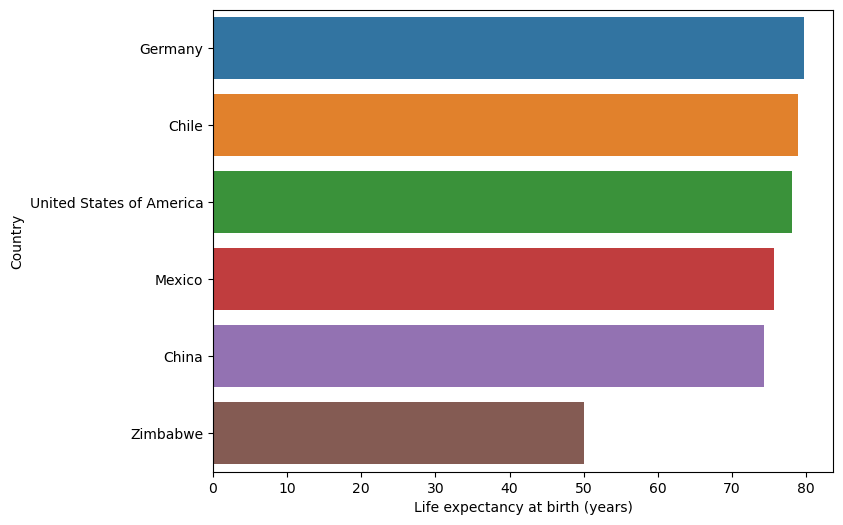

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=df_means, order=df_means.sort_values(by="Life expectancy at birth (years)", ascending=False)["Country"])
plt.xlabel("Life expectancy at birth (years)")

The above bar chart has been ordered to show the highest mean life expectancy first, followed by the remaining nations in descending order. 

We can see that Germany has the highest average life expectancy (79.66 years) and Zimbabwe the lowest (50.09 years)

# Q2: What is the distribution of that life expectancy?

A histogram using the seaborn library will be the most appropriate to investigate the distribution of this variable. 

<Figure size 800x600 with 0 Axes>

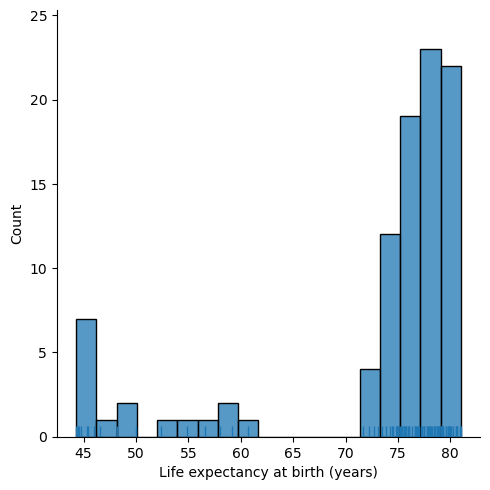

In [18]:
plt.figure(figsize=(8,6))
sns.displot(df["Life expectancy at birth (years)"], rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

The data is left-skewed with most of the values appearing on the right-hand side. This is likely as a result of Zimbabwe's mean life expectancy (50.09 years) which was over 24 years lower than the next lowest nation included in this dataset (China, 74.26 years)

# Q3: Has life expectancy increased over time in the six nations?

To explore this question, I will plot all six nations on a line graph with life expectancy at birth (years) plotted on the y-axis and the year plotted on the x-axis. 
This should provide a clear visual comparison between the nations of their change over the 16 years included in the data set.

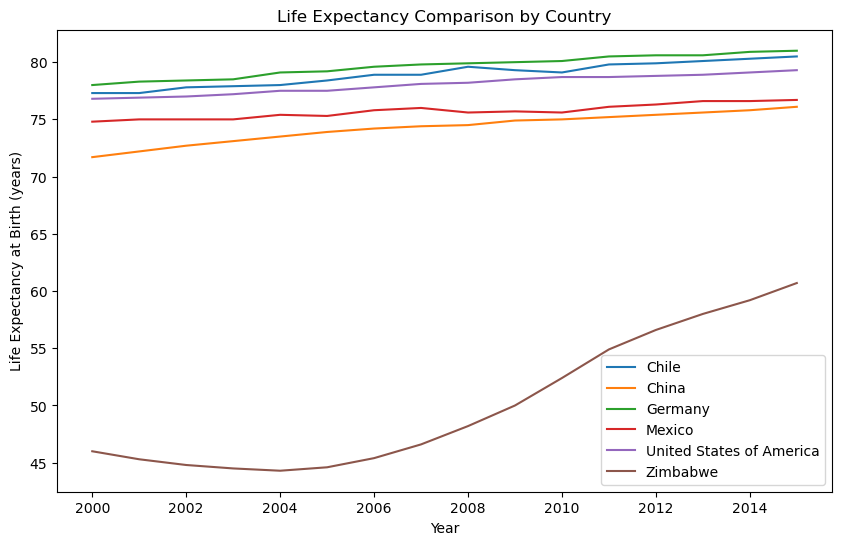

In [19]:
plt.figure(figsize=(10, 6))

for country in df['Country'].unique():
    plt.plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['Life expectancy at birth (years)'], label=country)

plt.title("Life Expectancy Comparison by Country")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth (years)")

plt.legend()

plt.show()

Zimbabwe's life expectancy appeared to drop between 2000 and 2004 before rising, seemingly exponentially, from 2004 - 2015. 
However, plotting all six countries on the same y-axis may overlook some nuances in the data given that Zimbabwe sits so far outside of the range of the remaining five nations. To overcome this issue, I will plot all nations on their own subplots. 

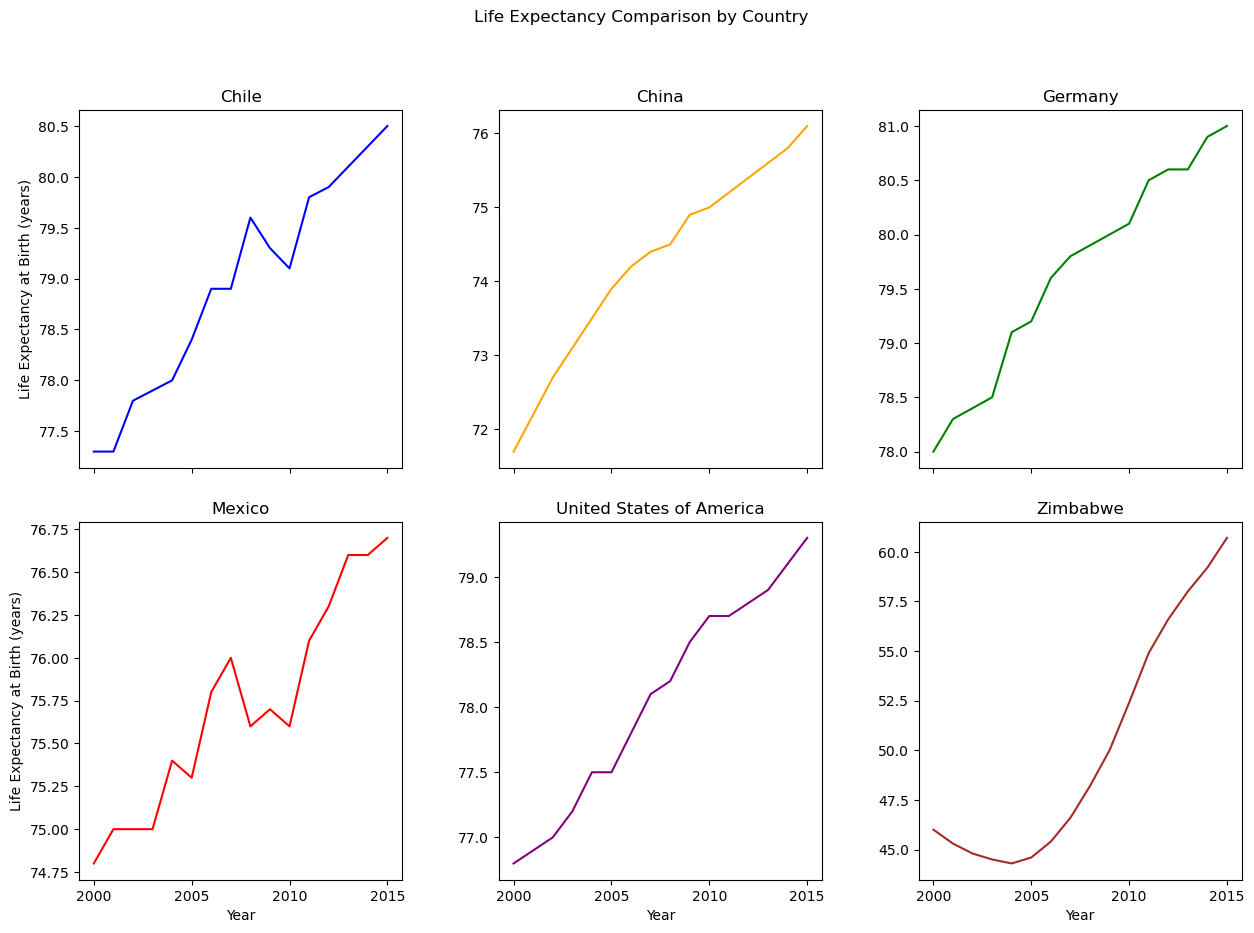

In [21]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

countries = df['Country'].unique()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, country in enumerate(countries):
    row = i // 3
    col = i % 3
    axs[row, col].plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['Life expectancy at birth (years)'], color=colors[i])
    axs[row, col].set_title(country)
    if row == 1:
        axs[row, col].set_xlabel('Year')
        axs[row, col].tick_params(axis='x', which='major', labelsize=10)
        axs[row, col].set_xticks([2000, 2005, 2010, 2015])
    else:
        axs[row, col].set_xticklabels([])
        axs[row, col].set_xticks([2000, 2005, 2010, 2015])
    if (row, col) == (0, 0) or (row, col) == (1, 0):
        axs[row, col].set_ylabel('Life Expectancy at Birth (years)')
    if (row, col) == (0, 0) or (row, col) == (1, 1):
        axs[row, col].yaxis.set_label_position("left")
        axs[row, col].yaxis.tick_left()

fig.suptitle('Life Expectancy Comparison by Country')

plt.subplots_adjust(hspace=0.15, wspace=0.3)

plt.show()


These subplots now provide a closer look at the data and show that both Mexico and Chile experienced dips in their life expectancy at birth around a similar time. I will plot these graphs with narrower tick labels on the x-axis to investigate further.

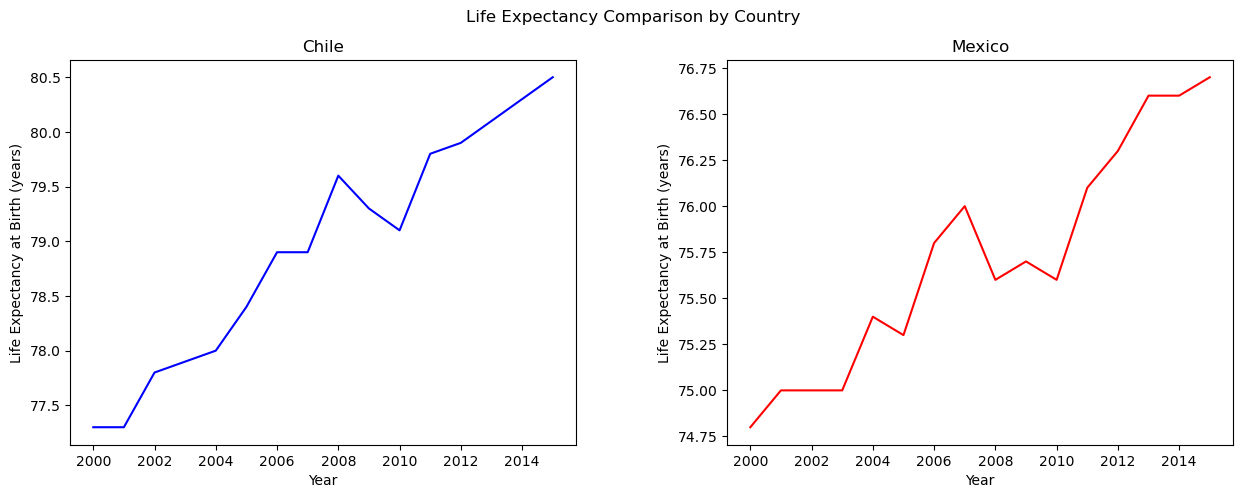

In [38]:
colors = ['blue', 'red']

countries = ['Chile', 'Mexico']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, country in enumerate(countries):
    axs[i].plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['Life expectancy at birth (years)'], color=colors[i])
    axs[i].set_title(country)
    axs[i].set_ylabel('Life Expectancy at Birth (years)')
    axs[i].set_xlabel('Year')
    axs[i].tick_params(axis='x', which='major', labelsize=10)
    axs[i].yaxis.set_label_position("left")
    axs[i].yaxis.tick_left()

fig.suptitle('Life Expectancy Comparison by Country')

plt.subplots_adjust(hspace=0.15, wspace=0.3)

plt.show()

This shows that Chile experienced a dip in 2008 and Mexico in 2007. Further exploration as to why this might be could be required but this data set does not allow for any deeper analysis. 

# Q4: Has GDP increased over time in the six nations?

As with life expectancy, I will begin by plotting all six nations on a line graph to compare their change over time. I will then plot all six on their own subplots to look for nuances in the data which may be lost when all plotted to the same y-axis. 

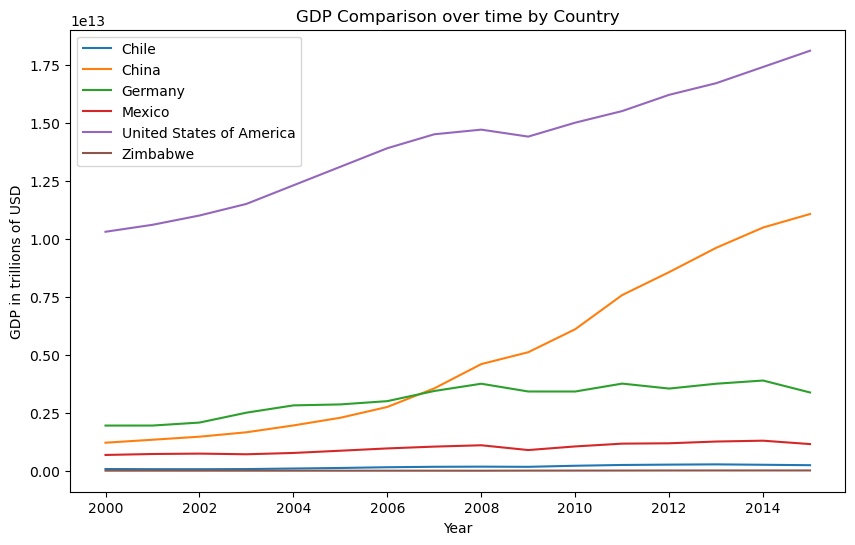

In [39]:
plt.figure(figsize=(10, 6))

for country in df['Country'].unique():
    plt.plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['GDP'], label=country)

plt.title("GDP Comparison over time by Country")
plt.xlabel("Year")
plt.ylabel("GDP in trillions of USD")

plt.legend()

plt.show()

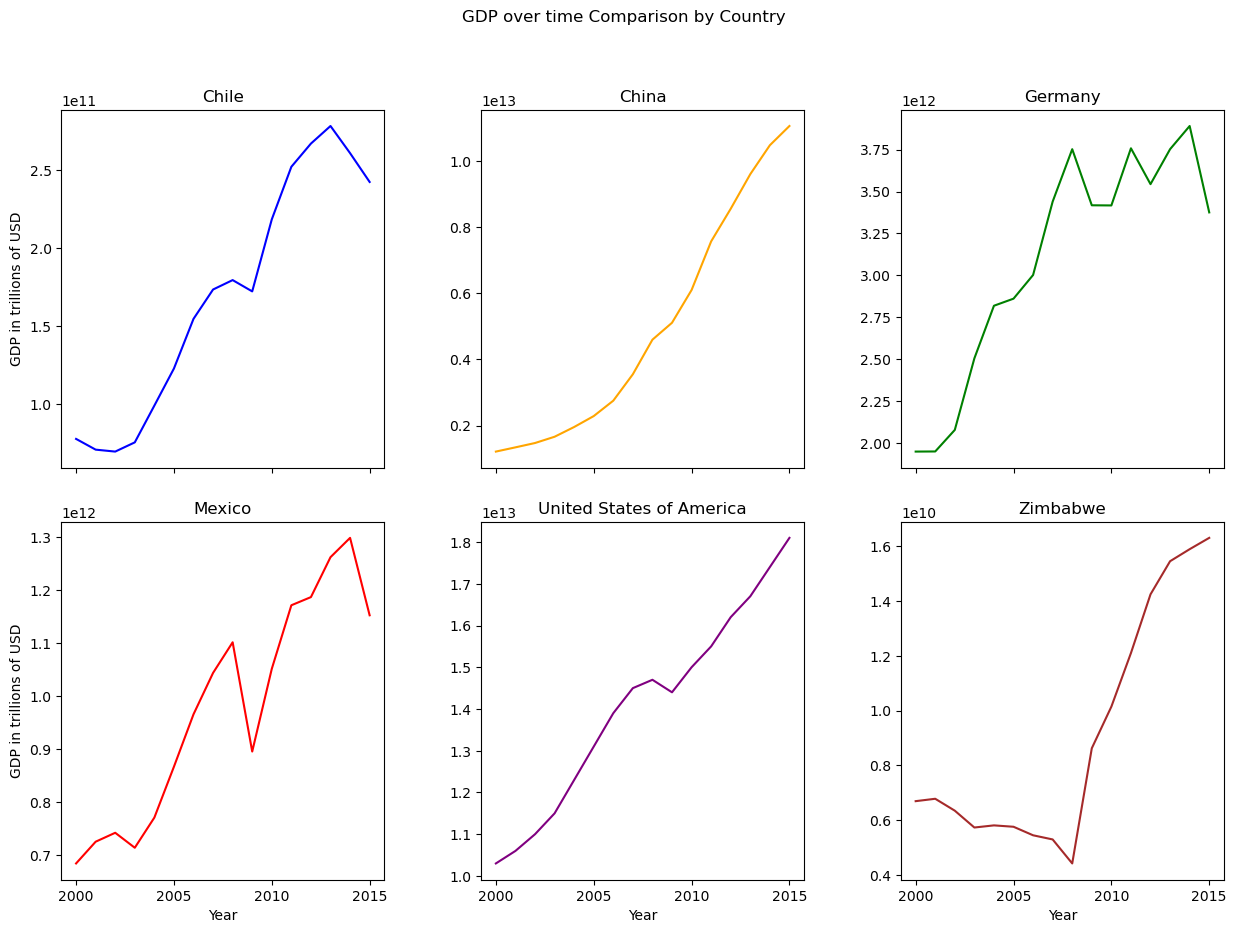

In [42]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

countries = df['Country'].unique()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, country in enumerate(countries):
    row = i // 3
    col = i % 3
    axs[row, col].plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['GDP'], color=colors[i])
    axs[row, col].set_title(country)
    if row == 1:
        axs[row, col].set_xlabel('Year')
        axs[row, col].tick_params(axis='x', which='major', labelsize=10)
        axs[row, col].set_xticks([2000, 2005, 2010, 2015])
    else:
        axs[row, col].set_xticklabels([])
        axs[row, col].set_xticks([2000, 2005, 2010, 2015])
    if (row, col) == (0, 0) or (row, col) == (1, 0):
        axs[row, col].set_ylabel('GDP in trillions of USD')
    if (row, col) == (0, 0) or (row, col) == (1, 1):
        axs[row, col].yaxis.set_label_position("left")
        axs[row, col].yaxis.tick_left()

fig.suptitle('GDP over time Comparison by Country')

plt.subplots_adjust(hspace=0.15, wspace=0.3)

plt.show()

In [47]:
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    gdp_start = country_df[country_df['Year'] == 2000]['GDP'].iloc[0]
    gdp_end = country_df[country_df['Year'] == 2015]['GDP'].iloc[0]
    gdp_growth = (gdp_end - gdp_start) / gdp_start * 100
    print(f"{country}: {gdp_growth:.2f}%")


Chile: 211.48%
China: 813.42%
Germany: 73.11%
Mexico: 68.55%
United States of America: 75.73%
Zimbabwe: 143.72%


All countries have experienced a net growth in GDP between the years 2000 and 2015, however, the scale of the growth has been vastly different.

Whilst the USA has the highest total GDP (1.75trn USD), China has experienced the largest growth during the period analysed rising 813.42% from around 0.1trn USD to over 1.0trn USD. 

# Q5: Is there a correlation between GDP and life expectancy of a country?

The most effective way to visualise correlation in data is through the use of a scatter plot. As with the other questions, I will explore each nation on a shared y-axis and through individual subplots. 

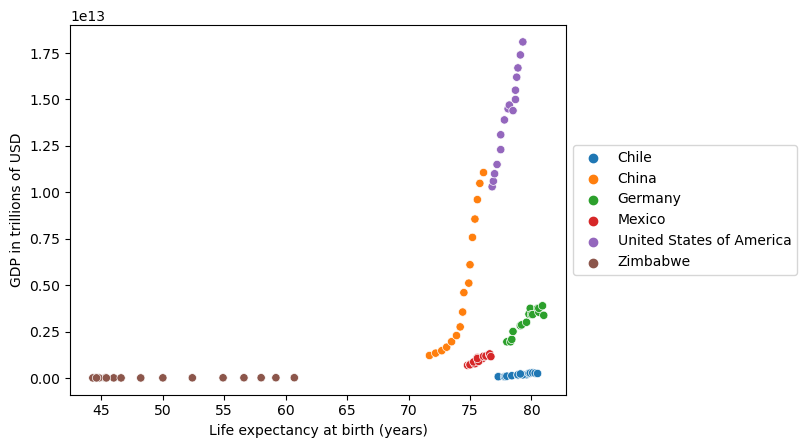

In [48]:
sns.scatterplot(x="Life expectancy at birth (years)", y=df.GDP, 
hue=df.Country, data=df).legend(loc='center left', 
bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in trillions of USD");

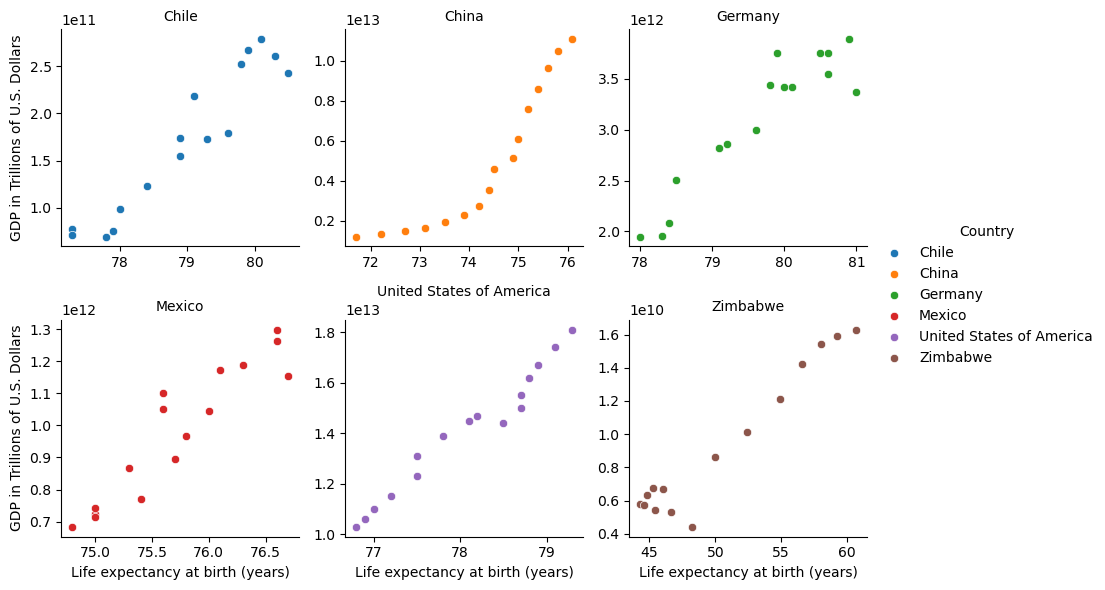

In [51]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue="Country", sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot, "Life expectancy at birth (years)", "GDP", data=df)
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars")
         .set_titles("{col_name}"))

Generally, there is a positive correlation between GDP and life expectancy across the six nations. 

When looking closely, we can see that the relationship does differ between nations with the nations on the second row (Mexico, USA, and Zimbabwe) all showing positive linear relationships. Meanwhile, China is showing an exponential curve in the dates featured and Chile and Germany's data appears to be slightly logarithmic and would require some closer investigation that is not possible with the current data set.

# Summary

- Q1: What is the average life expectancy in these nations?
    
    - Zimbabwe showed an average life expectancy of 50 years with all remaining nations showing an average in the mid 70s
    


- Q2: What is the distribution of that life expectancy?

    - Life expectancy was skewed left with most observations on the right-hand side. This is likely as a result of Zimbabwe's lower life expectancy when compared to the other five nations. 
    


- Q3: Has life expectancy increased over time in the six nations?

    - Yes, life expectancy has increased for all six nations over the time period sampled. Zimbabwe, Mexico, and Chile all showed dips throughout the period analysed but with a net increase overall. 
    


- Q4: Has GDP increased over time in the six nations?

    - Yes, GDP has increased over time in all six nations. However, as with life expectancy, the rates of change have been different with the USA showing the highest GDP but with China showing a much larger increase in GDP over the same period. 
    


- Q5: Is there a correlation between GDP and life expectancy of a country?

    - Yes, GDP and life expectancy are positively correlated across all six nations. However, the nature of the relationship differs between the nations. 
    


